In [2]:
!pip install matplotlib seaborn
!pip install kagglehub
!pip install gradio 

Forma del DataFrame: (1834, 34)


,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


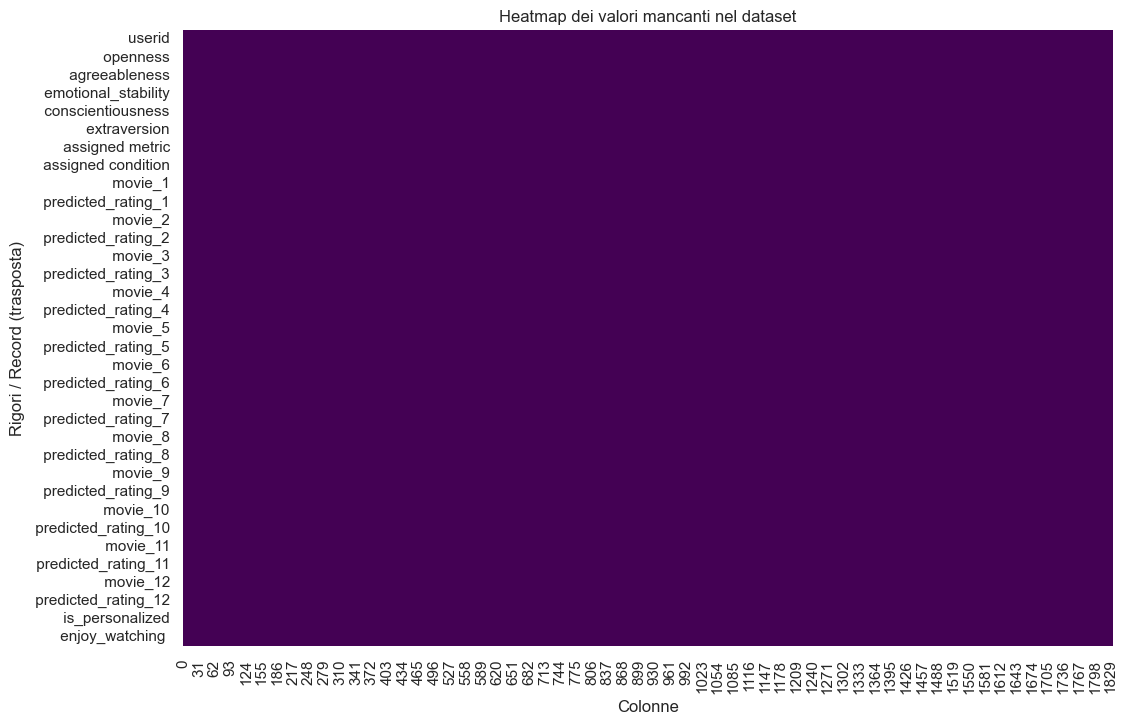

Almeno un valore mancante per colonna?:
userid                  False
 openness               False
 agreeableness          False
 emotional_stability    False
 conscientiousness      False
 extraversion           False
 assigned metric        False
 assigned condition     False
 movie_1                False
 predicted_rating_1     False
 movie_2                False
 predicted_rating_2     False
 movie_3                False
 predicted_rating_3     False
 movie_4                False
 predicted_rating_4     False
 movie_5                False
 predicted_rating_5     False
 movie_6                False
 predicted_rating_6     False
 movie_7                False
 predicted_rating_7     False
 movie_8                False
 predicted_rating_8     False
 movie_9                False
 predicted_rating_9     False
 movie_10               False
 predicted_rating_10    False
 movie_11               False
 predicted_rating_11    False
 movie_12               False
 predicted_rating_12    False


['userid',
 'openness',
 'agreeableness',
 'emotional_stability',
 'conscientiousness',
 'extraversion',
 'assigned_metric',
 'assigned_condition',
 'movie_1',
 'predicted_rating_1',
 'movie_2',
 'predicted_rating_2',
 'movie_3',
 'predicted_rating_3',
 'movie_4',
 'predicted_rating_4',
 'movie_5',
 'predicted_rating_5',
 'movie_6',
 'predicted_rating_6',
 'movie_7',
 'predicted_rating_7',
 'movie_8',
 'predicted_rating_8',
 'movie_9',
 'predicted_rating_9',
 'movie_10',
 'predicted_rating_10',
 'movie_11',
 'predicted_rating_11',
 'movie_12',
 'predicted_rating_12',
 'is_personalized',
 'enjoy_watching']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from collections import Counter


%matplotlib inline
sns.set(style="whitegrid")

# Caricamento del dataset da Kaggle
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "arslanali4343/top-personality-dataset",
    "2018-personality-data.csv"
)

# Verifica che il caricamento sia avvenuto
print("Forma del DataFrame:", df.shape)
display(df.head())

# Visualizzazione valori mancanti
plt.figure(figsize=(12, 8))
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax, cmap="viridis")

plt.xlabel("Colonne")
plt.ylabel("Rigori / Record (trasposta)")
plt.title("Heatmap dei valori mancanti nel dataset")
plt.show()

# Verifica testuale dei valori mancanti: restituisce True se almeno un valore mancante in ogni colonna
print("Almeno un valore mancante per colonna?:")
print(df.isna().any())

# Pulizia del dataset

print("\nColonne presenti:", df.columns.tolist())
print("Informazioni sul DataFrame:")
print(df.info())

# Rimozioni eventuali duplicati se ce ne sono
before = df.shape
df = df.drop_duplicates()
print("Prima drop_duplicates:", before, "Dopo:", df.shape)

# Standardizzazione dei nomi e delle colonne
# rimuove spazi iniziali/finali, converte in minuscolo, sostituisce spazi interni con underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Colonne standardizzate:", df.columns.tolist())

# Trasformazione di una colonna 'genres' se esiste
if 'genres' in df.columns:
    df['genres_list'] = df['genres'].astype(str).str.split('|')
    print("Colonna 'genres' trasformata in 'genres_list'.")
else:
    print("La colonna 'genres' non esiste. Si salta trasformazione generi.")


df.columns.tolist()




In [2]:
# vettori per il test
traits = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'emotional_stability']
user_vectors = df[traits].copy()
print("Primi vettori utenti:")
display(user_vectors.head())

#aggiungo il dataset dei film
movies = pd.read_csv('data/movies.csv')
print(movies.head())


movie_cols = [f'movie_{i}' for i in range(1, 13)]  # o quante ne hai


Primi vettori utenti:


,openness,conscientiousness,extraversion,agreeableness,emotional_stability
0,5.0,2.5,6.5,2.0,3.0
1,7.0,5.5,4.0,4.0,6.0
2,4.0,2.0,2.5,3.0,4.5
3,5.5,4.5,4.0,5.5,4.0
4,5.5,4.5,2.5,5.5,3.5


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
#COLLEGO I DUE DATASET

for col in movie_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
movies['movieId'] = pd.to_numeric(movies['movieId'], errors='coerce')

# Trasformo il dataframe: ogni (utente, film suggerito) diventa una riga
utenti_long = df.melt(id_vars=['userid'], value_vars=movie_cols, var_name='movie_slot', value_name='movieId')

# Unisco le info film tramite la colonna movieId
unione = utenti_long.merge(movies, how='left', on='movieId')

# Visualizza i primi risultati
print(unione.head())



                             userid movie_slot  movieId  \
0  8e7cebf9a234c064b75016249f2ac65e    movie_1    77658   
1  77c7d756a093150d4377720abeaeef76    movie_1    94959   
2  b7e8a92987a530cc368719a0e60e26a3    movie_1   110501   
3  92561f21446e017dd6b68b94b23ad5b7    movie_1     2905   
4  030001ac2145a938b07e686a35a2d638    movie_1     2905   

                              title                  genres  
0                     Cosmos (1980)             Documentary  
1           Moonrise Kingdom (2012)    Comedy|Drama|Romance  
2       The Raid 2: Berandal (2014)   Action|Crime|Thriller  
3  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  
4  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  


In [4]:

#PARTE DEL PREDICTED RATING (movie_slot=posizione dellla raccomandazione originale, predicted_rating=punteggio per quel suggerimento)
rating_cols = [f'predicted_rating_{i}' for i in range(1, 13)]
ratings_long = df.melt(id_vars=['userid'], value_vars=rating_cols, var_name='movie_slot', value_name='predicted_rating')

# Estraggo la posizione
utenti_long['movie_num'] = utenti_long['movie_slot'].str.extract(r'(\d+)')
ratings_long['movie_num'] = ratings_long['movie_slot'].str.extract(r'(\d+)')

# Unisco su userid con posizione
base = pd.merge(
    utenti_long, ratings_long[['userid', 'movie_num', 'predicted_rating']],
    how='left', on=['userid', 'movie_num']
)

finale = base.merge(movies, how='left', on='movieId')
print(finale.head())


                             userid movie_slot  movieId movie_num  \
0  8e7cebf9a234c064b75016249f2ac65e    movie_1    77658         1   
1  77c7d756a093150d4377720abeaeef76    movie_1    94959         1   
2  b7e8a92987a530cc368719a0e60e26a3    movie_1   110501         1   
3  92561f21446e017dd6b68b94b23ad5b7    movie_1     2905         1   
4  030001ac2145a938b07e686a35a2d638    movie_1     2905         1   

   predicted_rating                             title                  genres  
0          4.410466                     Cosmos (1980)             Documentary  
1          4.207280           Moonrise Kingdom (2012)    Comedy|Drama|Romance  
2          4.868064       The Raid 2: Berandal (2014)   Action|Crime|Thriller  
3          4.526371  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  
4          4.526371  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  


In [5]:

quiz_domande = [
    # Extraversion (E)
    {'testo': "Sono il tipo di persona che ama stare in compagnia.", 'fattore': 'E', 'reverse': False},
    {'testo': "Sono l'anima delle feste", 'fattore': 'E', 'reverse': False},
    {'testo': "Mi sento a mio agio tra la gente.", 'fattore': 'E', 'reverse': False},
    {'testo': "Tendo a stare in disparte.", 'fattore': 'E', 'reverse': True},
    {'testo': "Inizio conversazioni facilmente.", 'fattore': 'E', 'reverse': False},
    {'testo': "Parlo poco.", 'fattore': 'E', 'reverse': True},
    {'testo': "Parlo con tante persone alle feste.", 'fattore': 'E', 'reverse': False},
    {'testo': "Non amo attirare l'attenzione su di me.", 'fattore': 'E', 'reverse': True},
    {'testo': "Non mi dà fastidio essere al centro dell'attenzione.", 'fattore': 'E', 'reverse': False},
    {'testo': "Sono silenzioso davanti agli estranei.", 'fattore': 'E', 'reverse': True},

    # Agreeableness (A)
    {'testo': "Mi preoccupo poco degli altri.", 'fattore': 'A', 'reverse': True},
    {'testo': "Mi interessa conoscere le persone.", 'fattore': 'A', 'reverse': False},
    {'testo': "Offendo le persone.", 'fattore': 'A', 'reverse': True},
    {'testo': "Provo empatia verso i sentimenti degli altri.", 'fattore': 'A', 'reverse': False},
    {'testo': "Mi interessa conoscere i sentimenti degli altri.", 'fattore': 'A', 'reverse': False},
    {'testo': "Non mi interessano i problemi degli altri.", 'fattore': 'A', 'reverse': True},
    {'testo': "Ho un cuore tenero.", 'fattore': 'A', 'reverse': False},
    {'testo': "Non sono interessato agli altri.", 'fattore': 'A', 'reverse': True},
    {'testo': "Dedico tempo agli altri.", 'fattore': 'A', 'reverse': False},
    {'testo': "Provo le emozioni degli altri.", 'fattore': 'A', 'reverse': False},

    # Conscientiousness (C)
    {'testo': "Sono sempre preparato.", 'fattore': 'C', 'reverse': False},
    {'testo': "Lascio in giro le mie cose.", 'fattore': 'C', 'reverse': True},
    {'testo': "Faccio attenzione ai dettagli.", 'fattore': 'C', 'reverse': False},
    {'testo': "Faccio spesso pasticci.", 'fattore': 'C', 'reverse': True},
    {'testo': "Sbrigo le faccende subito.", 'fattore': 'C', 'reverse': False},
    {'testo': "Evito i miei doveri.", 'fattore': 'C', 'reverse': True},
    {'testo': "Amo l'ordine.", 'fattore': 'C', 'reverse': False},
    {'testo': "Dimentico spesso di rimettere le cose al loro posto.", 'fattore': 'C', 'reverse': True},
    {'testo': "Seguo una routine.", 'fattore': 'C', 'reverse': False},
    {'testo': "Sono scrupoloso nel mio lavoro.", 'fattore': 'C', 'reverse': False},

    # Emotional Stability (S)
    {'testo': "Mi stresso facilmente.", 'fattore': 'S', 'reverse': True},
    {'testo': "Sono rilassato la maggior parte del tempo.", 'fattore': 'S', 'reverse': False},
    {'testo': "Mi preoccupo spesso delle cose.", 'fattore': 'S', 'reverse': True},
    {'testo': "Raramente mi sento triste.", 'fattore': 'S', 'reverse': False},
    {'testo': "Sono facilmente turbato.", 'fattore': 'S', 'reverse': True},
    {'testo': "Mi arrabbio facilmente.", 'fattore': 'S', 'reverse': True},
    {'testo': "Cambio spesso umore.", 'fattore': 'S', 'reverse': True},
    {'testo': "Ho sbalzi d'umore frequenti.", 'fattore': 'S', 'reverse': True},
    {'testo': "Mi irrito facilmente.", 'fattore': 'S', 'reverse': True},
    {'testo': "Spesso mi sento triste.", 'fattore': 'S', 'reverse': True},

    # Openness (O)
    {'testo': "Ho un vocabolario ricco.", 'fattore': 'O', 'reverse': False},
    {'testo': "Ho difficoltà a comprendere idee astratte.", 'fattore': 'O', 'reverse': True},
    {'testo': "Ho molta immaginazione.", 'fattore': 'O', 'reverse': False},
    {'testo': "Capisco le cose.", 'fattore': 'O', 'reverse': True},
    {'testo': "Ho ottime idee.", 'fattore': 'O', 'reverse': False},
    {'testo': "Non ho molta immaginazione.", 'fattore': 'O', 'reverse': True},
    {'testo': "Capisco subito le cose.", 'fattore': 'O', 'reverse': False},
    {'testo': "Non mi interessa la creatività.", 'fattore': 'O', 'reverse': True},
    {'testo': "Uso parole difficili.", 'fattore': 'O', 'reverse': False},
    {'testo': "Ho molte idee.", 'fattore': 'O', 'reverse': False}
]


def calcola_bigfive(quiz_domande, risposte):
    punteggi = {'E': 0, 'A': 0, 'C': 0, 'S': 0, 'O': 0}
    conteggi = {'E': 0, 'A': 0, 'C': 0, 'S': 0, 'O': 0}
    for domanda, risposta in zip(quiz_domande, risposte):
        val = risposta if not domanda['reverse'] else (6 - risposta)
        fattore = domanda['fattore']
        punteggi[fattore] += val
        conteggi[fattore] += 1
    # Calcola la media per ogni tratto
    for k in punteggi:
        if conteggi[k] > 0:
            punteggi[k] = round(punteggi[k] / conteggi[k], 2)
    return punteggi



In [9]:
#RACCOMANDAZIONE 

def cosine_sim(u, v):
    try:
        u = np.asarray(u, dtype=float); v = np.asarray(v, dtype=float)
        if np.linalg.norm(u) == 0 or np.linalg.norm(v) == 0: return 0.0
        return float(np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)))
    except Exception:
        return 0.0

def profilo_to_vec_row(row):
    return np.array([
        row.get('openness', 0), row.get('conscientiousness', 0), row.get('extraversion', 0),
        row.get('agreeableness', 0), row.get('emotional_stability', 0)
    ], dtype=float)

def profilo_dict_to_vec(profilo):
    return np.array([profilo['O'], profilo['C'], profilo['E'], profilo['A'], profilo['S']], dtype=float)

def recommend_by_personality(profilo_dict, topN_users=10, topK_movies=200):
    """Ritorna: candidato_df (movieId,title,genres), vicini_df (topN users), movie_cols"""
    if 'df' not in globals() or 'movies' not in globals():
        raise RuntimeError("df o movies non caricati")
    vec_user = profilo_dict_to_vec(profilo_dict)
    if '_vec' not in df.columns:
        df['_vec'] = df.apply(lambda r: profilo_to_vec_row(r), axis=1)
    df['_sim_tmp'] = df['_vec'].apply(lambda v: cosine_sim(vec_user, v))
    vicini = df.sort_values('_sim_tmp', ascending=False).head(topN_users).copy()
    movie_cols = [c for c in df.columns if c.startswith('movie_')]
    candidate_scores = {}
    for _, r in vicini.iterrows():
        sim = r['_sim_tmp']
        for mcol in movie_cols:
            mid = r.get(mcol)
            if pd.isnull(mid): continue
            try: mid = int(mid)
            except: continue
            candidate_scores.setdefault(mid, []).append(sim)
    candidates = []
    for mid, sims in candidate_scores.items():
        avg_sim = float(np.mean(sims)) if len(sims)>0 else 0.0
        candidates.append((mid, avg_sim))
    candidates = sorted(candidates, key=lambda x: x[1], reverse=True)
    top_candidates = [c[0] for c in candidates[:topK_movies]]
    movies_subset = movies[movies['movieId'].isin(top_candidates)].copy()
    movies_subset['order'] = movies_subset['movieId'].apply(lambda x: top_candidates.index(x) if x in top_candidates else 999)
    movies_subset = movies_subset.sort_values('order').reset_index(drop=True)
    movies_subset['movieId'] = movies_subset['movieId'].astype(int)
    return movies_subset[['movieId','title','genres']], vicini, movie_cols

def compute_final_list_from_likes_exact(profilo_dict, liked_ids, vicini_df, movie_cols, final_k=10, disliked_ids=None):
    """Implementa la logica finale e *esclude* anche i film esplicitamente scartati (disliked_ids)."""
    if disliked_ids is None:
        disliked_ids = []

    #raccolgo candidati dai vicini
    film_candidati = set()
    for _, row in vicini_df.iterrows():
        for m in movie_cols:
            val = row.get(m)
            if pd.isnull(val): continue
            try: film_candidati.add(int(val))
            except: pass

    #escludo liked e disliked
    film_candidati = [f for f in film_candidati if f not in liked_ids and f not in disliked_ids]

    #film_personality_score come media di sim_pers dei vicini che suggeriscono il film
    film_personality_score = {}
    for m in film_candidati:
        indices = [i for i, row in enumerate(vicini_df[movie_cols].values) if m in row]
        scores = vicini_df.iloc[indices]['_sim_tmp'].values if indices else [0]
        film_personality_score[m] = float(np.mean(scores)) if len(scores)>0 else 0.0

    #profilo generi dai liked
    generi_tutti = set()
    for film_id in liked_ids:
        gen = movies[movies['movieId']==film_id]['genres'].values
        if gen.size>0 and pd.notnull(gen[0]):
            generi_tutti.update(gen[0].split('|'))
    generi_lista = sorted(list(generi_tutti))

    if len(generi_lista) > 0:
        profilo_film_feedback = np.mean([
            np.array([1 if g in set(movies[movies['movieId']==film]['genres'].iloc[0].split('|')) else 0 for g in generi_lista], dtype=float)
            for film in liked_ids if movies[movies['movieId']==film].shape[0]>0 and pd.notnull(movies[movies['movieId']==film]['genres'].iloc[0])
        ], axis=0)
    else:
        profilo_film_feedback = None

    #combino le cose sopra
    dati_out = []
    for m in film_candidati:
        film_row = movies[movies['movieId']==m]
        if film_row.shape[0]==0: continue
        genres = film_row['genres'].iloc[0] if pd.notnull(film_row['genres'].iloc[0]) else ''
        if profilo_film_feedback is None or len(generi_lista)==0:
            sim_feedback = 0.0
        else:
            gs = set(genres.split('|')) if genres!='' else set()
            genere_vec = np.array([1 if g in gs else 0 for g in generi_lista], dtype=float)
            sim_feedback = cosine_sim(genere_vec, profilo_film_feedback)
        sim_pers = film_personality_score.get(m, 0.0)
        score = 0.5 * sim_feedback + 0.5 * sim_pers
        dati_out.append({'movieId': m, 'title': film_row['title'].iloc[0], 'genres': genres,
                         'sim_feedback': sim_feedback, 'sim_personality': sim_pers, 'score': score})
    finale_df = pd.DataFrame(dati_out).sort_values('score', ascending=False).head(final_k).reset_index(drop=True)
    return finale_df


In [25]:

import json, traceback, os
import gradio as gr
import pandas as pd
os.makedirs("output", exist_ok=True)

# mappa e componenti quiz
mappa_valori = {"decisamente no":1, "no":2, "neutrale":3, "sì":4, "decisamente sì":5}
choices_descritti = list(mappa_valori.keys())
quiz_inputs = [gr.Radio(choices=choices_descritti, label=f"{i+1}. {q['testo']}", value=None) for i,q in enumerate(quiz_domande)]

def start_and_show_first(*risposte_radio):
    try:
        if any(r is None for r in risposte_radio):
            return ("Per favore rispondi a tutte le domande.", {}, "", "", "", gr.update(visible=False), gr.update(visible=False))

        risposte_num = [mappa_valori[r] for r in risposte_radio]
        profilo = calcola_bigfive(quiz_domande, risposte_num)

        candidato_df, vicini_df, movie_cols = recommend_by_personality(profilo, topN_users=10, topK_movies=200)
        risultato_records = candidato_df.to_dict(orient='records')

        stato = {
            'profilo': profilo,
            'vicini': vicini_df,
            'movie_cols': movie_cols,
            'risultato': risultato_records,
            'idx': 0,
            'feedback': [],
            'count_liked': 0,
            'liked': []
        }

        if len(risultato_records) == 0:
            return "Nessun candidato trovato.", stato, "", "", "", gr.update(visible=False), gr.update(visible=False)

        primo = risultato_records[0]
        film_md = f"**Film suggerito #1:** {primo.get('title','Titolo non disponibile')} — {primo.get('genres','')}"
        progress = f"{stato['count_liked']} film scelti su 5"

        return f"Profilo calcolato: {profilo}", stato, film_md, progress, "", gr.update(visible=True), gr.update(visible=True)

    except Exception:
        tb = traceback.format_exc()
        return "Errore avvio.", {}, "", "", f"```\n{tb}\n```", gr.update(visible=False), gr.update(visible=False)


def feedback_handler_loop(state, liked=False):
    global LAST_PROFILE, LAST_FINAL_DF, LAST_FEEDBACK_DF
    try:
        if not isinstance(state, dict) or state == {}:
            return "Stato mancante o non valido.", {}, "", "", "", gr.update(visible=False), gr.update(visible=False)

        idx = state.get('idx', 0)
        risultato = state.get('risultato', [])

        df_feedback = pd.DataFrame(state.get('feedback', []))
        film_selezionati = df_feedback[df_feedback['feedback']==1]['movieId'].tolist() if not df_feedback.empty else []
        disliked_ids = df_feedback[df_feedback['feedback']==0]['movieId'].tolist() if not df_feedback.empty else []

        # finale condizione
        if idx >= len(risultato) or state.get('count_liked',0) >= 5:
            finale_df = compute_final_list_from_likes_exact(
                state['profilo'], film_selezionati,
                state['vicini'], state['movie_cols'],
                final_k=10, disliked_ids=disliked_ids
            )

            LAST_PROFILE = state['profilo']
            LAST_FINAL_DF = finale_df
            LAST_FEEDBACK_DF = df_feedback

            # salva output
            with open("output/profilo_utente.json", "w") as f:
                json.dump(LAST_PROFILE, f)

            finale_df.to_csv("output/final_recommendations.csv", index=False)
            df_feedback.to_csv("output/feedback.csv", index=False)

            # testo finale
            md = "### I tuoi film preferiti:\n\n"
            for mid in film_selezionati:
                row = movies[movies['movieId']==mid]
                if row.shape[0] > 0:
                    md += f"- **{row['title'].iloc[0]}** — {row['genres'].iloc[0]}\n"

            md += "\n### Raccomandazioni finali:\n\n"
            for _, r in finale_df.iterrows():
                md += f"- **{r['title']}** — {r['genres']}\n"

            return "Processo completato!", state, md, "", "", gr.update(visible=False), gr.update(visible=False)

        # processa feedback corrente
        current = risultato[idx]
        mid = int(current.get('movieId')) if current.get('movieId') is not None else None
        state['feedback'].append({'userid':'testuser1','movieId':mid,'feedback':1 if liked else 0})
        if liked:
            state['count_liked'] += 1
            state['liked'].append(mid)
        state['idx'] += 1
        progress = f"{state.get('count_liked',0)} film scelti su 5"

        # se raggiunge 5 liked → finale
        if state['count_liked'] >= 5:
            df_feedback = pd.DataFrame(state.get('feedback', []))
            film_selezionati = df_feedback[df_feedback['feedback']==1]['movieId'].tolist()
            disliked_ids = df_feedback[df_feedback['feedback']==0]['movieId'].tolist()

            finale_df = compute_final_list_from_likes_exact(
                state['profilo'], film_selezionati,
                state['vicini'], state['movie_cols'],
                final_k=10, disliked_ids=disliked_ids
            )

            LAST_PROFILE = state['profilo']
            LAST_FINAL_DF = finale_df
            LAST_FEEDBACK_DF = df_feedback

            # salva risultati
            with open("output/profilo_utente.json", "w") as f:
                json.dump(LAST_PROFILE, f)

            finale_df.to_csv("output/final_recommendations.csv", index=False)
            df_feedback.to_csv("output/feedback.csv", index=False)

            md = "### I tuoi film preferiti:\n\n"
            for mid in film_selezionati:
                row = movies[movies['movieId']==mid]
                if row.shape[0] > 0:
                    md += f"- **{row['title'].iloc[0]}** — {row['genres'].iloc[0]}\n"

            md += "\n### Raccomandazioni finali:\n\n"
            for _, r in finale_df.iterrows():
                md += f"- **{r['title']}** — {r['genres']}\n"

            return "Hai scelto 5 film! Ecco i risultati:", state, md, "", "", gr.update(visible=False), gr.update(visible=False)

        # mostra film successivo
        if state['idx'] < len(risultato):
            nxt = risultato[state['idx']]
            film_md = f"**Film suggerito #{state['idx']+1}:** {nxt.get('title','')} — {nxt.get('genres','')}"
            return "Feedback registrato.", state, film_md, progress, "", gr.update(visible=True), gr.update(visible=True)

        # se finita la lista → finale
        else:
            df_feedback = pd.DataFrame(state.get('feedback', []))
            film_selezionati = df_feedback[df_feedback['feedback']==1]['movieId'].tolist()
            disliked_ids = df_feedback[df_feedback['feedback']==0]['movieId'].tolist()

            finale_df = compute_final_list_from_likes_exact(
                state['profilo'], film_selezionati,
                state['vicini'], state['movie_cols'],
                final_k=10, disliked_ids=disliked_ids
            )

            LAST_PROFILE = state['profilo']
            LAST_FINAL_DF = finale_df
            LAST_FEEDBACK_DF = df_feedback

            finale_df.to_csv("output/final_recommendations.csv", index=False)
            df_feedback.to_csv("output/feedback.csv", index=False)

            md = "### I tuoi film preferiti:\n\n"
            for mid in film_selezionati:
                row = movies[movies['movieId']==mid]
                if row.shape[0] > 0:
                    md += f"- **{row['title'].iloc[0]}** — {row['genres'].iloc[0]}\n"

            md += "\n### Raccomandazioni finali:\n\n"
            for _, r in finale_df.iterrows():
                md += f"- **{r['title']}** — {r['genres']}\n"

            return "Lista finita!", state, md, "", "", gr.update(visible=False), gr.update(visible=False)

    except Exception:
        tb = traceback.format_exc()
        return "Errore durante feedback.", state, "", "", f"```\n{tb}\n```", gr.update(visible=False), gr.update(visible=False)


def handle_yes(state): return feedback_handler_loop(state, liked=True)
def handle_no(state):  return feedback_handler_loop(state, liked=False)

info_quiz_it = """ **Informazioni sul Big Five Inventory Test (BFI)** 
Il Big Five è il modello di personalità più accettato e utilizzato nella psicologia accademica. 
Nasce dallo studio statistico delle risposte a centinaia di domande sulla personalità. 
Utilizzando la factor analysis, i ricercatori analizzano le risposte per rispondere alla domanda: 
"Qual è il modo migliore per sintetizzare la personalità di un individuo?" 
Dai numerosi studi in tutto il mondo emergono cinque tratti principali: 
- **Estroversione (Extraversion)** 
- **Nevroticismo / Instabilità emotiva (Neuroticism)** 
- **Gradevolezza / Amicalità (Agreeableness)** 
- **Coscienziosità (Conscientiousness)** 
- **Apertura mentale all’esperienza (Openness to Experience)** 

Questo quiz utilizza il **modello Big Five** per consigliare film basati sulla tua personalità. 
Compila il quiz attentamente per ricevere raccomandazioni personalizzate! """

# UI Gradio
with gr.Blocks() as demo:
    # HEADER
    gr.Markdown("""
    <div style="text-align:center;">
        <h1 style="font-size:48px; margin:0;">MOVIE RECC</h1>
        <h3 style="font-size:14px; margin:0; letter-spacing:2px;">MOVIE RECOMMENDATION SYSTEM BASED ON PERSONALITY</h3>
        <hr style="width:70%; margin:10px auto 20px auto;">
    </div>
    """)

    # DESCRIZIONE
    gr.Markdown("""
    **Benvenuto!**  
    Rispondi al quiz della personalità per permettere di identificare il tuo profilo psicologico e confrontarlo con migliaia di utenti simili.  
    Dopo il quiz, vedrai dei film uno alla volta: clicca **Sì** se ti interessa, **No** se non ti attira.  
    Quando avrai scelto **5 film che ti piacciono**, il sistema genererà per te **le 10 raccomandazioni finali** più affini ai tuoi gusti.
    """)

    gr.Markdown(info_quiz_it)

    # QUIZ
    for comp in quiz_inputs:
        comp.render()

    btn_start = gr.Button("Calcola profilo e avvia")
    info_text = gr.Markdown()
    film_md = gr.Markdown()
    progress_md = gr.Markdown()
    error_md = gr.Markdown()
    state_comp = gr.State()
    btn_yes = gr.Button("Sì", visible=False)
    btn_no  = gr.Button("No", visible=False)

    btn_start.click(start_and_show_first, quiz_inputs,
                    [info_text, state_comp, film_md, progress_md, error_md, btn_yes, btn_no])
    btn_yes.click(handle_yes, [state_comp],
                  [info_text, state_comp, film_md, progress_md, error_md, btn_yes, btn_no])
    btn_no.click(handle_no, [state_comp],
                 [info_text, state_comp, film_md, progress_md, error_md, btn_yes, btn_no])

demo.launch(inline=True, share=False)


* Running on local URL:  http://127.0.0.1:7876
* To create a public link, set `share=True` in `launch()`.
